# Inaugural Project

Imports and set magics:

Importerer python fil

In [14]:
import numpy as np

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import matplotlib.pyplot as plt
import Functions as fn
model = fn.ExchangeEconomyClass()
from scipy.optimize import minimize
import scipy.optimize as optimize

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

**Explain how you solve the model**



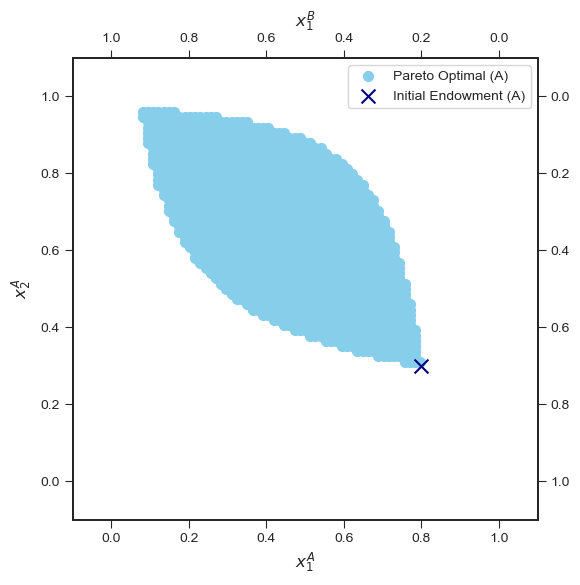

In [15]:

par = model.par
pareto_improvements = model.pareto()
model.edgeworth_box()

# Question 2

Now we calculate the error in the market clearing conditions. That is we examine how far the market is from equilibrium for each price p_1 within P1


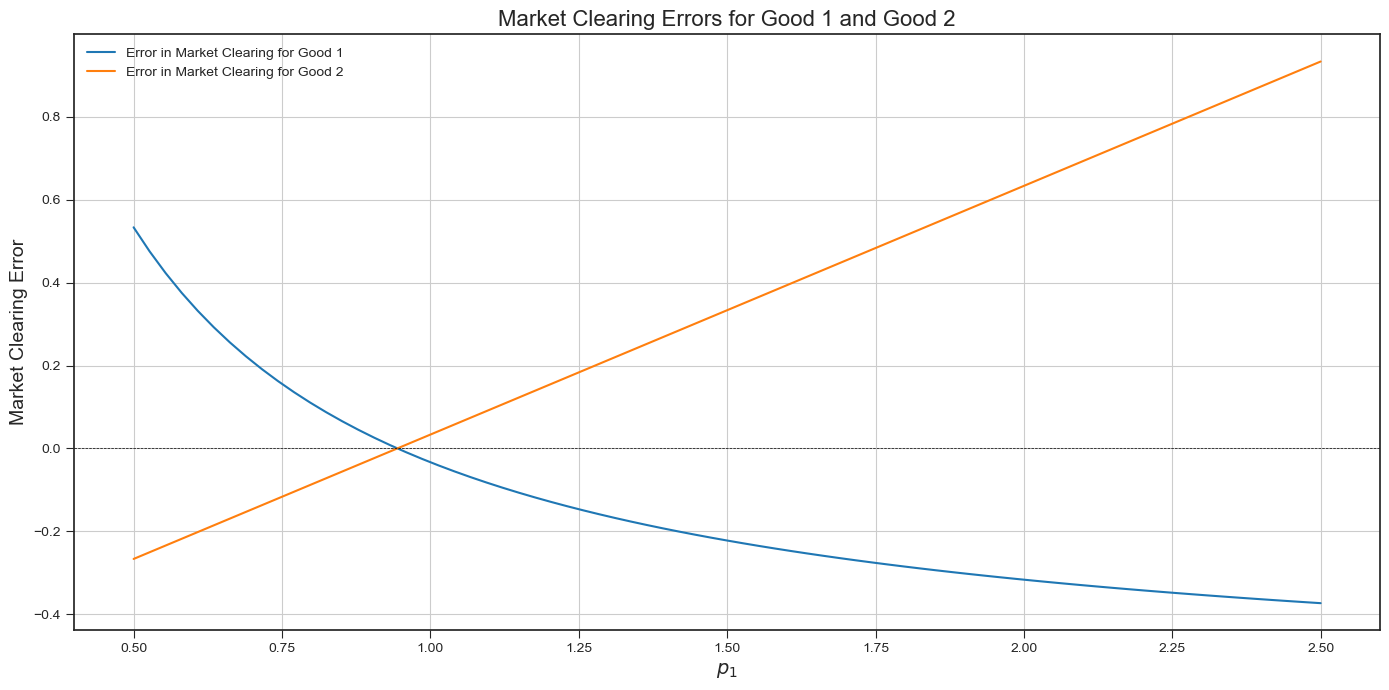

In [16]:

N_p1 = 75 
p1_values = np.linspace(0.5, 2.5, N_p1) 
epsilon_1 = []
epsilon_2 = []
p1_valuess= []
for p1 in p1_values:
    error_1 = model.market_clearing_x1(p1)
    error_2 = model.market_clearing_x2(p1)
    epsilon_1.append(error_1)
    epsilon_2.append(error_2)
    p1_valuess.append(p1)
plt.figure(figsize=(14, 7))
plt.plot(p1_valuess, epsilon_1, label='Error in Market Clearing for Good 1')
plt.plot(p1_valuess, epsilon_2, label='Error in Market Clearing for Good 2')
plt.xlabel('$p_1$', fontsize=14)
plt.ylabel('Market Clearing Error', fontsize=14)
plt.title('Market Clearing Errors for Good 1 and Good 2', fontsize=16)
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Question 3

Now we find the market clearing price by minimizing the errors 

In [17]:
p1__ = (par.alpha*par.w2A+par.beta*par.w2B)/(1-par.alpha*par.w1A - par.beta*par.w1B)
print(f'The equilibrium price of good 1 is : {p1__:.3f}')

The equilibrium price of good 1 is : 0.944


# Question 4

Now we assume that A chooses the price to maximize her own utility. 
We find the allocation, first in the scenario where only prices in P1 can be chosen. Secondly the allocation if any positive price can be chosen. 
We assume that A chooses B's consumption, but that B cannot be worse of than in the initial endowment. Thus A is market maker


In [18]:
utility_1 = -np.inf
price_1 = None
for p1 in p1_values:
    demand_B_x1, demand_B_x2 = model.demand_B(p1)
    if 1 - demand_B_x1 > 0 and 1 - demand_B_x2 > 0:
        utilitymax_A = model.utility_A(1 - demand_B_x1, 1 - demand_B_x2)
        if utilitymax_A > utility_1:
            utility_1 = utilitymax_A
            price_1 = p1
x1A_allocation, x2A_allocation = model.demand_A(price_1)

print(f'Consumer A will choose p1 = {price_1:.2f} to maximize its own utility, which is {utility_1:.2f}')
print(f'The allocation is given as: x1A = {1 - model.demand_B(price_1)[0]:.2f} and x2A = {1 - model.demand_B(price_1)[1]:.2f}')


Consumer A will choose p1 = 1.47 to maximize its own utility, which is 0.44
The allocation is given as: x1A = 0.39 and x2A = 0.47


# Question 5
Now we find the allocation if choice set is restricted to C. That is the choice set has to be Pareto efficient 

In [19]:
max_utility_A = -np.inf
optimal_allocation_A = None

for allocation in pareto_improvements:
    xA1, xA2 = allocation
    xB1 = 1 - xA1
    xB2 = 1 - xA2
    utility_A = model.utility_A(xA1, xA2)
    utility_B = model.utility_B(xB1, xB2)
    if utility_A > max_utility_A and utility_B > model.utility_B(0.8, 0.3):
        max_utility_A = utility_A
        optimal_allocation_A = allocation

optimal_xA1_4c, optimal_xA2_4c = optimal_allocation_A
print(f"Optimal Allocation for A: xA1 = {optimal_xA1_4c}, xA2 = {optimal_xA2_4c}")
optimal_xB1_4c = 1 - optimal_xA1_4c
optimal_xB2_4c = 1 - optimal_xA2_4c
print(f"Optimal Allocation for B: xB1 = {optimal_xB1_4c}, xB2 = {optimal_xB2_4c}")

# optimal utility for agent A
optimal_utility_A_4c = model.utility_A(optimal_xA1_4c, optimal_xA2_4c)
print(f"Optimal Utility for A: {optimal_utility_A_4c}")



Optimal Allocation for A: xA1 = 0.2972972972972973, xA2 = 0.6081081081081081
Optimal Allocation for B: xB1 = 0.7027027027027026, xB2 = 0.3918918918918919
Optimal Utility for A: 0.47905368262195996


# Question 6



In [20]:

initial_guess = [0.5, 0.5]
bounds = [(0, 1), (0, 1)]
opt_result = minimize(model.aggregate_utility, initial_guess, bounds=bounds, method='SLSQP')
optimal_x1A, optimal_x2A = opt_result.x
optimal_x1B, optimal_x2B = 1 - optimal_x1A, 1 - optimal_x2A
print(f'Optimal allocation for A: Good 1: {optimal_x1A}, Good 2: {optimal_x2A}')
print(f'Optimal allocation for B: Good 1: {optimal_x1B}, Good 2: {optimal_x2B}')

Optimal allocation for A: Good 1: 0.3334116578920504, Good 2: 0.666588310103883
Optimal allocation for B: Good 1: 0.6665883421079496, Good 2: 0.333411689896117


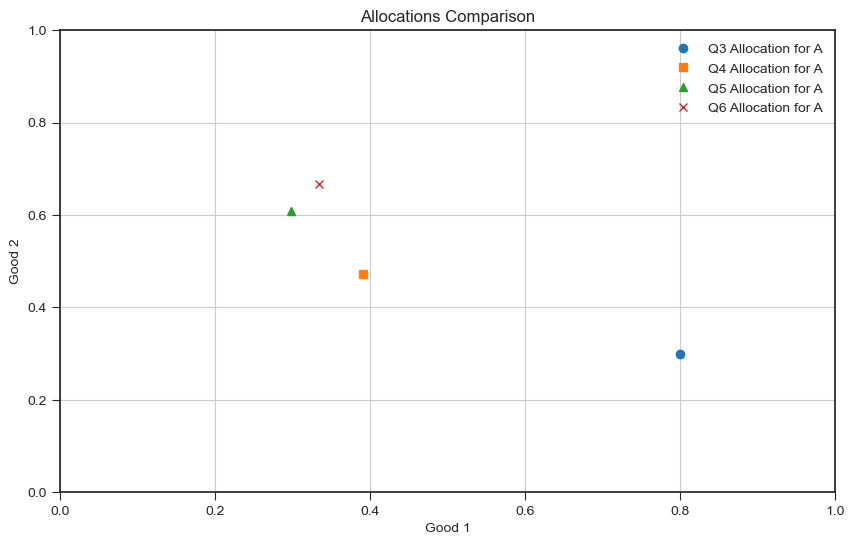

In [21]:

allocation_Q3 = (par.w1A, par.w2A) 
allocation_Q4 = (1 - model.demand_B(price_1)[0], 1 - model.demand_B(price_1)[1]) 
allocation_Q5 = (optimal_xA1_4c, optimal_xA2_4c)  
allocation_Q6 = (optimal_x1A, optimal_x2A)  

plt.figure(figsize=(10, 6))


plt.plot(allocation_Q3[0], allocation_Q3[1], 'o', label='Q3 Allocation for A')

plt.plot(allocation_Q4[0], allocation_Q4[1], 's', label='Q4 Allocation for A')

plt.plot(allocation_Q5[0], allocation_Q5[1], '^', label='Q5 Allocation for A')

plt.plot(allocation_Q6[0], allocation_Q6[1], 'x', label='Q6 Allocation for A')

plt.xlim(0, 1)  # Set x-axis limits from 0 to 1
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1

plt.xlabel('Good 1')
plt.ylabel('Good 2')
plt.title('Allocations Comparison')
plt.legend()
plt.grid(True)

plt.show()


# Question 7 & 8



Maximum combined utility is 1.056 with endowments w1A = 0.253, w2A = 0.569


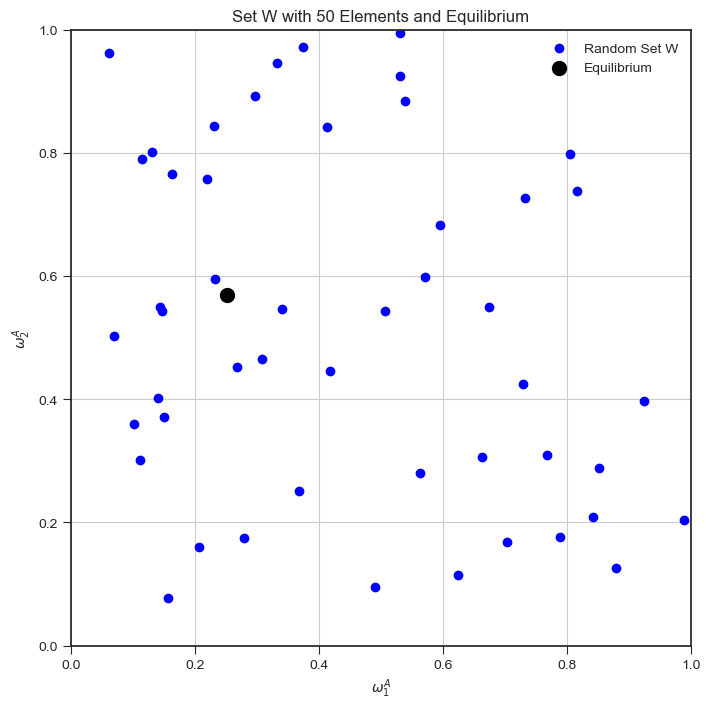

In [22]:


num_elements = 50
w1_samples = np.random.uniform(0, 1, num_elements)
w2_samples = np.random.uniform(0, 1, num_elements)
W_set = list(zip(w1_samples, w2_samples))

max_combined_utility = -np.inf
best_endowments = None

for w1A, w2A in W_set:
  
    model.par.w1A, model.par.w2A = w1A, w2A
    model.par.w1B, model.par.w2B = 1 - w1A, 1 - w2A 
    

    utility_A = model.utility_A(w1A, w2A)
    utility_B = model.utility_B(1 - w1A, 1 - w2A)
    

    combined_utility = utility_A + utility_B
    

    if combined_utility > max_combined_utility:
        max_combined_utility = combined_utility
        best_endowments = (w1A, w2A)


print(f"Maximum combined utility is {max_combined_utility:.3f} with endowments w1A = {best_endowments[0]:.3f}, w2A = {best_endowments[1]:.3f}")


plt.figure(figsize=(8, 8))


plt.scatter(w1_samples, w2_samples, c='blue', label='Random Set W')


plt.scatter([best_endowments[0]], [best_endowments[1]], c='black', label='Equilibrium', s=100)


plt.title('Set W with 50 Elements and Equilibrium')
plt.xlabel('$\omega_1^A$')
plt.ylabel('$\omega_2^A$')
plt.xlim(0, 1)
plt.ylim(0, 1)

plt.legend(loc='upper right') 
plt.grid(True)
plt.show()

